# **parte 2**

In [ ]:
import pandas as pd

EXERCICIO 21

In [ ]:
df = pd.read_csv("/content/household_power_consumption.txt", sep=';', na_values="?")

In [ ]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
df['Datetime'] = pd.to_datetime(df["Date"] + ' ' + df["Time"], format="%d/%m/%Y %H:%M:%S")


In [ ]:
df = df.set_index("Datetime")

In [ ]:
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"])

In [ ]:
df_hour = df["Global_active_power"].resample("1h").mean()

In [ ]:
maior_consumo = df_hour.groupby(df_hour.index.hour).mean().sort_values().round(2)
print(maior_consumo)

Datetime
4     0.44
3     0.44
5     0.45
2     0.48
1     0.54
0     0.66
6     0.79
23    0.90
16    0.95
15    0.99
17    1.06
14    1.08
13    1.14
12    1.21
11    1.25
10    1.26
18    1.33
9     1.33
22    1.41
8     1.46
7     1.50
19    1.73
21    1.88
20    1.90
Name: Global_active_power, dtype: float64


EXERCICIO 22

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot


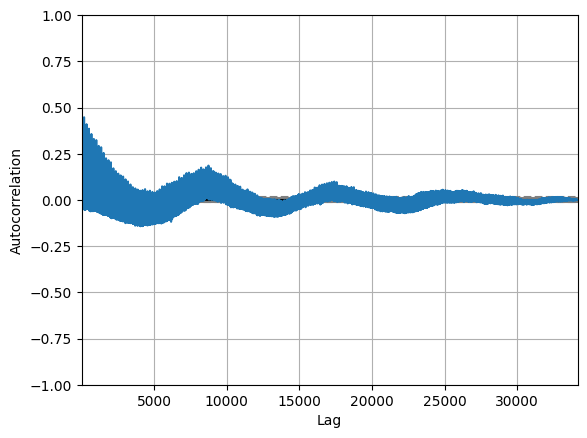

In [ ]:
autocorrelation_plot(df_hour.dropna())
plt.show()


In [ ]:
print("Correlação lag 1h:", df_hour.autocorr(lag=1))
print("Correlação lag 24h:", df_hour.autocorr(lag=24))
print("Correlação lag 48h:", df_hour.autocorr(lag=48))

Correlação lag 1h: 0.7134555946916454
Correlação lag 24h: 0.4359072259119912
Correlação lag 48h: 0.40126926204501584


In [ ]:
#Existem padrões que se repetem diariamente

EXERCICIO 24

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:

X = df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]].dropna()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada por componente:", pca.explained_variance_ratio_)

Variância explicada por componente: [0.59103759 0.22718543]


EXERCICIO 24

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

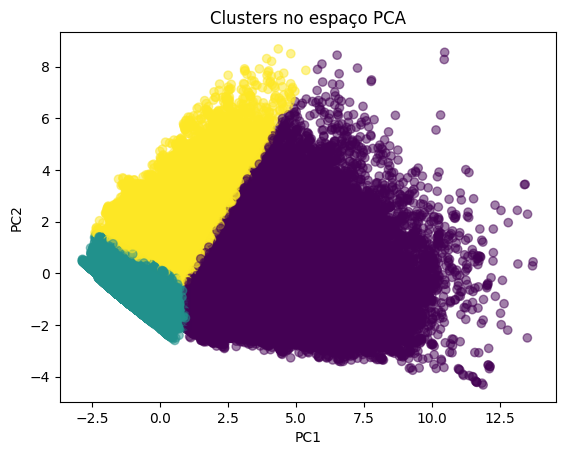

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.5)
plt.title("Clusters no espaço PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
#Não se separam de uma forma clara

EXERCICIO 25

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
X = df[["Voltage"]].dropna()
y = df.loc[X.index, "Global_active_power"]


In [ ]:
# Modelo linear
lin = LinearRegression()
lin.fit(X, y)
y_pred_lin = lin.predict(X)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lin_poly = LinearRegression()
lin_poly.fit(X_poly, y)
y_pred_poly = lin_poly.predict(X_poly)


In [ ]:
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

In [ ]:
print("RMSE Linear:", rmse_lin)
print("RMSE Polinomial:", rmse_poly)

RMSE Linear: 0.969135832624744
RMSE Polinomial: 0.9648154069545043


# **parte 3**

EXERCICIO 26

In [ ]:
df = pd.read_csv("/content/energydata_complete.csv" )

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df.shape

(19735, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


EXERCICIO 27

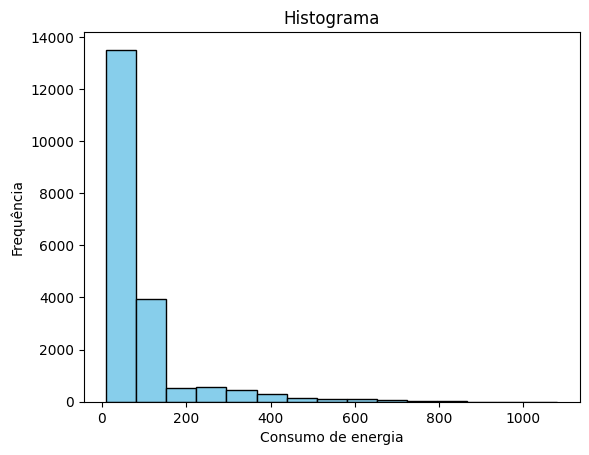

In [ ]:
plt.hist(df["Appliances"], bins= 15, color='skyblue', edgecolor='black')
plt.title('Histograma')
plt.xlabel('Consumo de energia')
plt.ylabel('Frequência')
plt.show()

In [ ]:
#O consumo tende a se concentrar a valores baixos

EXERCÍCIO 28

In [ ]:
correlacoes  = df.drop(columns=['date']).corr()['Appliances'].sort_values( ascending=False)
print(correlacoes)

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


EXERCICIO 29

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
vars_num = df.select_dtypes(include=['float64','int64']).columns

In [ ]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[vars_num] = scaler.fit_transform(df[vars_num])

EXERCICIO 30

In [ ]:
# Aplicar PCA em variáveis numéricas
X = df_scaled[vars_num].drop('Appliances', axis=1)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

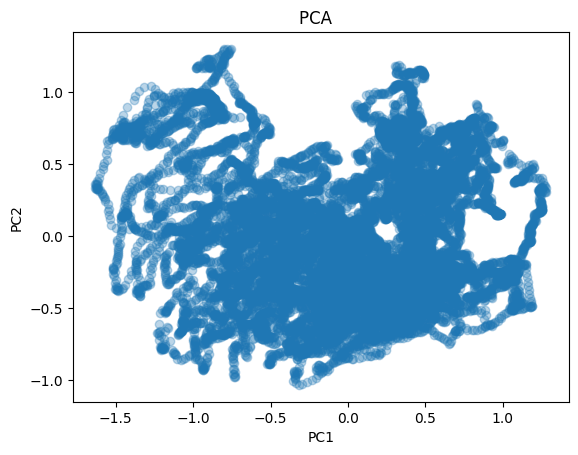

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3)
plt.title("PCA  ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
#O gráfico do PCA com dois componentes principais mostra uma distribuição contínua de pontos, sem padrões ou agrupamentos naturais muito bem definidos.
#Existem apenas algumas regiões com maior densidade, mas não há indícios de clusters claros.

EXERCICICIO 31

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#Regressão linear múltipla
X = df_scaled.drop("Appliances", axis=1)
y = df_scaled["Appliances"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.drop(columns=["date"])
X_test = X_test.drop(columns=["date"])
y_train = y_train.drop(columns=["date"])
y_test = y_test.drop(columns=["date"])

In [ ]:
reg_lin = LinearRegression().fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

In [ ]:
print("R²:", r2_score(y_test, y_pred))
print("Erro Médio (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.17372343967481219
Erro Médio (RMSE): 0.08208111352706489


EXERCICIO 32

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("R² (RandomForest):", r2_score(y_test, y_pred_rf))
print("RMSE (RandomForest):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

#Comparação: Random Forest teve desempenho bem melhor que a Regressão Linear.
#O Random forest possui maior variabilidade e maior precisão.

R² (RandomForest): 0.538074173510757
RMSE (RandomForest): 0.06137148688347229


EXERCICIO 33

In [ ]:
X = df_scaled.drop(columns=["date"])
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

In [ ]:
df_scaled['Cluster'] = clusters

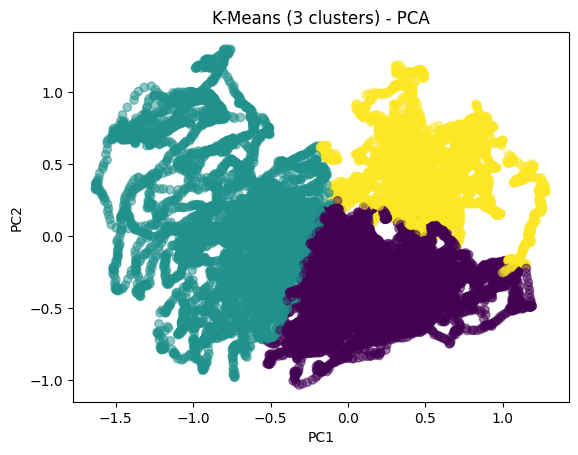

In [ ]:
#Visualizar em PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("K-Means (3 clusters) - PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
#Ver perfis de consumo médios
print(df_scaled.groupby('Cluster')['Appliances'].mean())

Cluster
0    0.075828
1    0.091616
2    0.080934
Name: Appliances, dtype: float64


In [ ]:
#Interpretação: cada cluster mostra um perfil diferente de consumo(0=baixo consumo, 1= alto consumo, 2= médio consumo)